In [1]:
import pandas as pd #helps to create multi dimensional array , matrix etc 
import numpy as np #helps to deal with arrays and matrix using built in math function 
import seaborn as sns  #for data visualization 
import matplotlib.pyplot as plt # used for plotting 
%matplotlib inline


In [2]:

df = pd.read_csv('arduino_sec_data_temp_2.csv') #opening dataset and putting it in df variable 
df 

,Time,Temperature
0,0,18.09
1,1,18.00
2,2,18.06
3,3,17.16
4,4,17.29
...,...,...
596,596,37.62
597,597,38.49
598,598,38.59
599,599,37.82


In [3]:
print("Dataset shape")
df.shape

Dataset shape


(601, 2)

In [4]:
print("Dataset info")
df.info() # Checks for any missing values and how many there are in each column.

Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         601 non-null    int64  
 1   Temperature  601 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.5 KB


<AxesSubplot:>

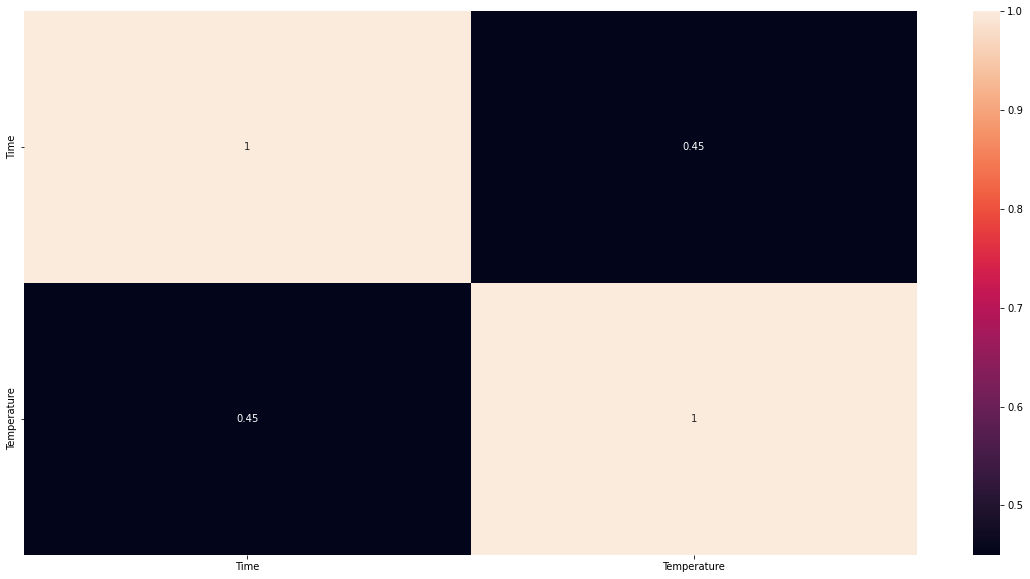

In [5]:
matrix = df.corr().round(2)     
fig= plt.subplots(figsize=(20,10)) # figsize in inches
sns.heatmap(data=matrix,annot=True)

In [6]:
print("Looking for null values ")
df.isnull().sum()

Looking for null values 


Time           0
Temperature    0
dtype: int64

In [7]:
print("Checking for unique values for each columns")
df.isnull().sum()

Checking for unique values for each columns


Time           0
Temperature    0
dtype: int64

In [8]:
df.duplicated()
df.duplicated().sum()

0

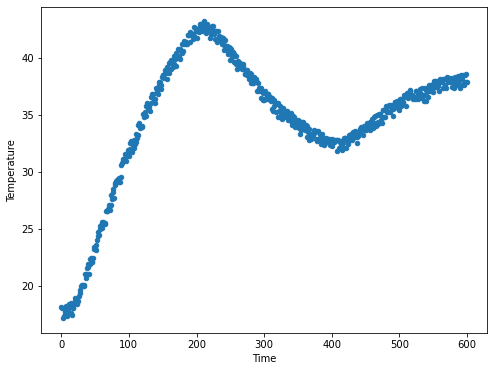

In [9]:
df.plot.scatter(x='Time', y='Temperature', figsize=(8,6))
plt.show()

<AxesSubplot:>

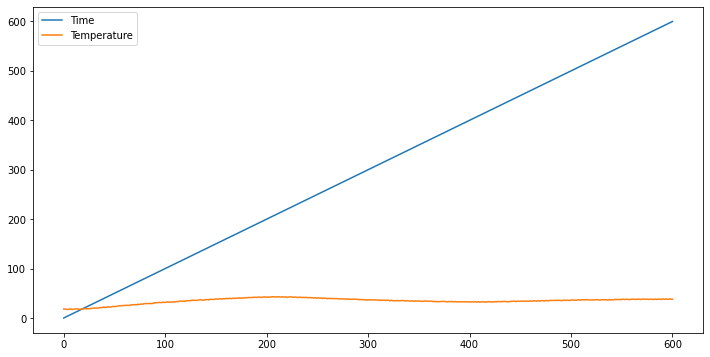

In [10]:
df.plot(figsize=(12,6))

In [11]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values #spilting the data

In [12]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) #defining variables 

In [13]:
from sklearn.linear_model import LinearRegression

model=LinearRegression() # X train is the question and y train is the answer.
model.fit(x_train,y_train)
accuracy=model.score(x_test,y_test)

#LinearRegression()

In [14]:
y_train_pred = model.predict(x_train)  #predicting temperature 
y_test_pred = model.predict(x_test)
print('Predicted Values: ', y_test_pred)
print('Actual    Values: ', y_test)

Predicted Values:  [38.9900071  30.94094521 32.98280282 32.61290108 35.26139755 35.23180541
 36.6966163  36.17875387 35.92722068 33.76699451 34.62516655 38.62010536
 36.26753028 37.93948616 32.92361854 31.97667008 35.63129929 37.3328473
 31.0889059  33.32311242 32.93841461 33.50066526 36.62263596 33.70781023
 33.61903381 33.75219844 33.45627705 35.77925999 39.03439531 34.13689625
 38.60530929 33.07157924 33.81138272 30.88176093 35.73487178 32.56851287
 36.48947133 34.72873904 33.870567   37.31805123 33.57464561 30.37869456
 34.66955476 32.68688143 31.4292155  38.19101934 38.81245427 30.18634565
 37.42162372 35.94201675 36.40069491 35.27619362 35.32058183 32.30218361
 37.1848866  37.52519621 35.43895038 30.28991814 34.18128446 31.69554476
 36.00120103 30.42308277 33.20474386 33.29352028 30.48226705 33.82617879
 37.28845909 35.45374645 33.13076352 36.11956959 38.97521103 34.38842944
 30.71900416 33.16035566 37.24407088 30.67461595 33.55984954 31.11849804
 36.57824775 38.41296039 37.95428

Text(0.5, 0, 'Time')

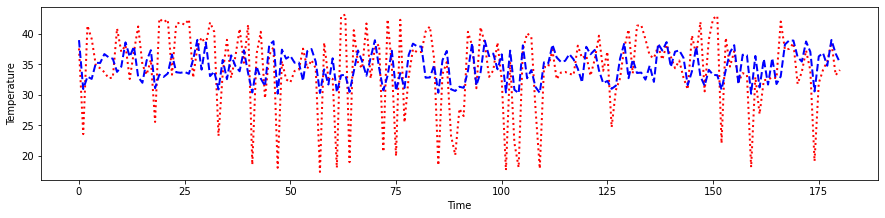

In [15]:
Temp_Actual = y_test
Temp_Predict =y_test_pred
plt.figure(1,figsize=(15,7))
plt.subplot(2,1,1)
plt.plot(Temp_Actual, 'r:' , linewidth=2, label='Temperature (Actual)' )
plt.plot(Temp_Predict, 'b--',linewidth=2, label='Temperature (Predicted)')
plt.ylabel('Temperature')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

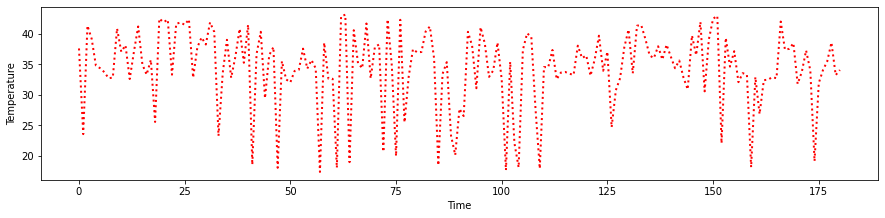

In [16]:
Temp_Actual = y_test
plt.figure(1,figsize=(15,7))
plt.subplot(2,1,1)
plt.plot(Temp_Actual, 'r:' , linewidth=2, label='Temperature (Actual)' )
plt.ylabel('Temperature')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

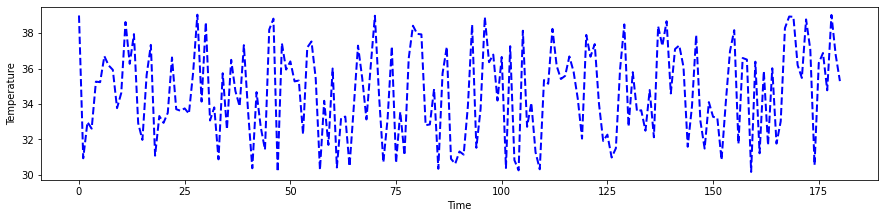

In [17]:
Temp_Predict = y_test_pred
plt.figure(1,figsize=(15,7))
plt.subplot(2,1,1)
plt.plot(Temp_Predict, 'b--',linewidth=2, label='Temperature (Predicted)')
plt.ylabel('Temperature')
plt.xlabel('Time')

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)

print("Training accuracy")
print("RMSE is   :{:.2F}". format(rmse))
print("R2 score is {:.2f}".format(r2))

Training accuracy
RMSE is   :5.13
R2 score is 0.20


In [19]:
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2 = r2_score(y_test,y_test_pred)

print("Testing accuracy:")
print("RMSE is {:.2f}".format(rmse))
print("R2 score is : {:.2f}".format(r2))

Testing accuracy:
RMSE is 5.62
R2 score is : 0.20


In [20]:
accuracy = model.score(x_test, y_test)
print("Model accuracy: {:.2f}". format(accuracy))

Model accuracy: 0.20
